In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [52]:
cohort_count = pd.read_csv('./cohort_counts.csv', index_col=0,parse_dates=True)
cohort_count

,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


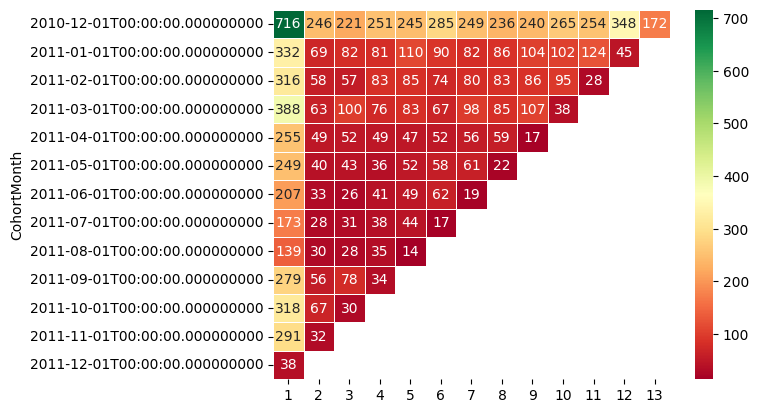

In [53]:
sns.heatmap(cohort_count, annot=True, fmt='.0f', cmap='RdYlGn', linewidths=0.5)
plt.show()

In [54]:
online = pd.read_csv('./online.csv', index_col=0,parse_dates=['InvoiceDate'])
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [55]:
online.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70864 entries, 416792 to 312243
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    70864 non-null  int64         
 1   StockCode    70864 non-null  object        
 2   Description  70864 non-null  object        
 3   Quantity     70864 non-null  int64         
 4   InvoiceDate  70864 non-null  datetime64[ns]
 5   UnitPrice    70864 non-null  float64       
 6   CustomerID   70864 non-null  int64         
 7   Country      70864 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 4.9+ MB


In [56]:
# Define a function that will parse the date
import datetime as dt
def get_day(x): 
    return dt.datetime(x.year, x.month, x.day) 

# Create InvoiceDay column
online['InvoiceDay'] = online['InvoiceDate'].apply(get_day) 

# Group by CustomerID and select the InvoiceDay value
grouping = online.groupby('CustomerID')['InvoiceDay'] 

# Assign a minimum InvoiceDay value to the dataset
online['CohortDay'] = grouping.transform('min')

# View the top 5 rows
(online.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-04-11
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-09-12
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-14
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-11-23
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-02-25


In [63]:
grouping.aggregate('min').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceDay,CohortDay,CohortIndex
CustomerID,,,,,,,,,,
12747,537215,21136,ASSORTED COLOUR BIRD ORNAMENT,1,2010-12-05 15:38:00,0.85,United Kingdom,2010-12-05,2010-12-05,1
12748,537136,10120,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-05 12:42:00,0.04,United Kingdom,2010-12-05,2010-12-05,1
12749,552694,22170,CLOTHES PEGS RETROSPOT PACK 24,2,2011-05-10 15:25:00,0.55,United Kingdom,2011-05-10,2011-05-10,1
12820,541283,21098,50'S CHRISTMAS GIFT BAG LARGE,4,2011-01-17 12:34:00,0.55,United Kingdom,2011-01-17,2011-01-17,1
12822,566580,21485,CHILDRENS APRON SPACEBOY DESIGN,2,2011-09-13 13:46:00,0.65,United Kingdom,2011-09-13,2011-09-13,1


In [57]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceDay')

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortDay')

In [58]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
days_diff = invoice_day - cohort_day

# Extract the difference in days from all previous values
online['CohortIndex'] = years_diff * 365 + months_diff * 30 + days_diff + 1
(online.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,CohortIndex
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-04-11,195
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-09-12,69
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-14,1
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-11-23,1
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-02-25,91


In [68]:
online['InvoiceMonth'] = online['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, 1))
online['CohortMonth'] = online['CohortDay'].apply(lambda x: dt.datetime(x.year, x.month, 1))

invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')  
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')   
years_diff = invoice_year - cohort_year 
months_diff = invoice_month - cohort_month  
online['CohortIndex'] = years_diff * 12 + months_diff + 1 
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,CohortIndex,CohortMonth,InvoiceMonth
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-04-11,7,2011-04-01,2011-10-01
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-09-12,3,2011-09-01,2011-11-01
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-14,1,2011-07-01,2011-07-01
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-11-23,1,2011-11-01,2011-11-01
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-02-25,4,2011-02-01,2011-05-01


In [69]:
# Count the number of unique values per customer ID
online['CohortMonth'] = online.CohortDay.apply(lambda x: x.strftime('%Y-%m'))

grouping = online.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.343575,0.308659,0.350559,0.342179,0.398045,0.347765,0.329609,0.335196,0.370112,0.354749,0.486034,0.240223
2011-01,1.0,0.207831,0.246988,0.243976,0.331325,0.271084,0.246988,0.259036,0.313253,0.307229,0.373494,0.135542,NaN
2011-02,1.0,0.183544,0.180380,0.262658,0.268987,0.234177,0.253165,0.262658,0.272152,0.300633,0.088608,NaN,NaN
2011-03,1.0,0.162371,0.257732,0.195876,0.213918,0.172680,0.252577,0.219072,0.275773,0.097938,NaN,NaN,NaN
2011-04,1.0,0.192157,0.203922,0.192157,0.184314,0.203922,0.219608,0.231373,0.066667,NaN,NaN,NaN,NaN
2011-05,1.0,0.160643,0.172691,0.144578,0.208835,0.232932,0.244980,0.088353,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.159420,0.125604,0.198068,0.236715,0.299517,0.091787,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.161850,0.179191,0.219653,0.254335,0.098266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.215827,0.201439,0.251799,0.100719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price 
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
print(average_price.round(1))

CohortIndex   1    2    3    4    5    6    7    8    9    10   11   12   13
CohortMonth                                                                 
2010-12      3.0  3.0  3.0  2.8  2.7  6.9  2.8  3.0  2.7  2.7  3.0  2.8  2.6
2011-01      3.2  3.1  3.0  3.0  3.1  3.0  3.0  2.5  2.7  2.9  2.6  2.0  NaN
2011-02      3.1  4.0  3.3  2.9  3.3  2.9  2.8  2.7  2.9  2.7  3.1  NaN  NaN
2011-03      3.5  3.6  3.5  2.8  2.7  2.5  2.7  2.9  2.5  2.4  NaN  NaN  NaN
2011-04      3.3  4.4  3.4  2.6  2.8  2.8  2.8  2.6  2.6  NaN  NaN  NaN  NaN
2011-05      3.1  2.8  2.5  2.7  2.5  2.3  2.7  2.3  NaN  NaN  NaN  NaN  NaN
2011-06      2.8  2.4  2.7  3.1  2.5  2.4  2.5  NaN  NaN  NaN  NaN  NaN  NaN
2011-07      3.2  3.1  3.4  2.5  2.4  2.3  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-08      2.9  3.7  5.4  6.9  4.2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-09      2.9  3.1  3.0  2.6  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-10      2.9  2.7  2.5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

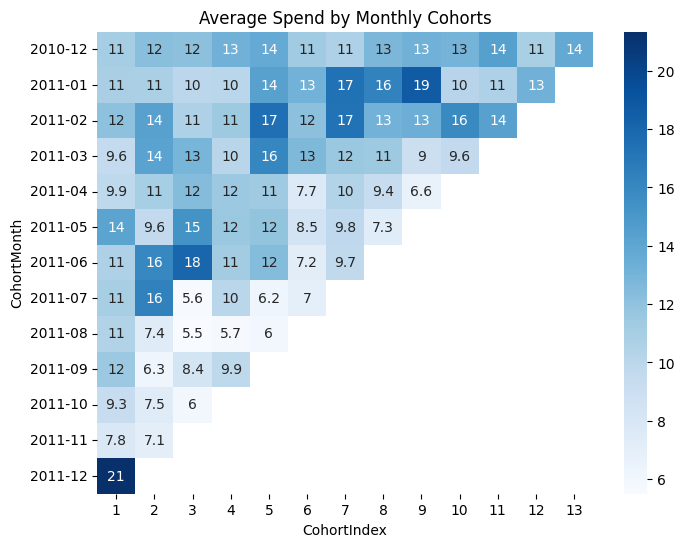

In [76]:
# Import seaborn package as sns
import seaborn as sns
average_quantity = online.groupby(['CohortMonth', 'CohortIndex'])['Quantity'].mean().reset_index().pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(average_quantity, annot=True, cmap='Blues')
plt.show()